[View in Colaboratory](https://colab.research.google.com/github/rishabh-vij/rishabh-vij.github.io/blob/master/Invasive_species_classifier.ipynb)

## Invasive species classifier 98 % accuracy

In [0]:
#!pip install opencv-python
#!apt update && apt install -y libsm6 libxext6
!pip3 install http://download.pytorch.org/whl/cu80/torch-0.3.0.post4-cp36-cp36m-linux_x86_64.whl 
! pip3 install fastai
#!pip3 install torchvision
#! pip install torchtext

In [3]:
!wget http://files.fast.ai/models/weights.tgz

--2018-08-11 01:28:24--  http://files.fast.ai/models/weights.tgz
Resolving files.fast.ai (files.fast.ai)... 67.205.15.147
Connecting to files.fast.ai (files.fast.ai)|67.205.15.147|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1195411318 (1.1G) [text/plain]
Saving to: ‘weights.tgz’

weights.tgz         100%[===================>]   1.11G  35.6MB/s    in 32s     

2018-08-11 01:28:56 (35.2 MB/s) - ‘weights.tgz’ saved [1195411318/1195411318]



In [4]:
!mkdir /usr/local/lib/python3.6/dist-packages/fastai/weights
!tar -xvzf weights.tgz -C /usr/local/lib/python3.6/dist-packages/fastai/

weights/
weights/wrn_50_2f.pth
weights/resnext_101_32x4d.pth
weights/resnext_101_64x4d.pth
weights/inceptionresnetv2-d579a627.pth
weights/inceptionv4-97ef9c30.pth
weights/resnext_50_32x4d.pth


In [14]:
!apt update && apt install -y libsm6 libxext6


Hit:1 http://archive.ubuntu.com/ubuntu artful InRelease
Hit:2 http://archive.ubuntu.com/ubuntu artful-updates InRelease
Hit:3 http://archive.ubuntu.com/ubuntu artful-backports InRelease
Hit:4 http://security.ubuntu.com/ubuntu artful-security InRelease
Reading package lists... Done
Building dependency tree       
Reading state information... Done
All packages are up to date.
Reading package lists... Done
Building dependency tree       
Reading state information... Done
libsm6 is already the newest version (2:1.2.2-1).
libxext6 is already the newest version (2:1.3.3-1).
0 upgraded, 0 newly installed, 0 to remove and 0 not upgraded.


In [0]:
from fastai.imports import *
from fastai.torch_imports import *
from fastai.transforms import *
from fastai.conv_learner import *
from fastai.model import *
from fastai.dataset import *
from fastai.sgdr import *
from fastai.plots import *

## Getting data from kaggle

In [75]:
!wget --header="Host: storage.googleapis.com" --header="User-Agent: Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/68.0.3440.106 Safari/537.36" --header="Accept: text/html,application/xhtml+xml,application/xml;q=0.9,image/webp,image/apng,*/*;q=0.8" --header="Accept-Language: en-GB,en-US;q=0.9,en;q=0.8" "https://storage.googleapis.com/kaggle-competitions-data/kaggle/6469/train.7z?GoogleAccessId=web-data@kaggle-161607.iam.gserviceaccount.com&Expires=1534214758&Signature=klpuVug0rl%2BxjOGW7U%2BoJUgFolRztu9f3Gk1sXfVC4INFdEE5XImym%2FLDV2NIZgosZh8lPGnTMDMuA4rp%2BLL1kxP06Ycdmjk65bsbuI0%2B3Yw5b323VUikvefKCM%2Bo4u8hu8SgX6pi9GKKOdEeL%2Be9cFCBcsRiz4n%2BhPZRrbKhviJzS1ktgtfLhDe0yp71i2P8NSWPPjiFZSjjwHKy5TBW%2FEPypV%2FzkaqtYzbFnsqDsAONYctZ5VnDxK6XBkcuTK4qNibTASfJyZxTOZuEjpseTV4lsHkH4vVo%2BORv5EDqk23OSMwA8meDmMrfzimQXMLoOF%2B3SBeV1WIJaRFoOuMNg%3D%3D" -O "train.7z" -c

--2018-08-11 02:46:34--  https://storage.googleapis.com/kaggle-competitions-data/kaggle/6469/train.7z?GoogleAccessId=web-data@kaggle-161607.iam.gserviceaccount.com&Expires=1534214758&Signature=klpuVug0rl%2BxjOGW7U%2BoJUgFolRztu9f3Gk1sXfVC4INFdEE5XImym%2FLDV2NIZgosZh8lPGnTMDMuA4rp%2BLL1kxP06Ycdmjk65bsbuI0%2B3Yw5b323VUikvefKCM%2Bo4u8hu8SgX6pi9GKKOdEeL%2Be9cFCBcsRiz4n%2BhPZRrbKhviJzS1ktgtfLhDe0yp71i2P8NSWPPjiFZSjjwHKy5TBW%2FEPypV%2FzkaqtYzbFnsqDsAONYctZ5VnDxK6XBkcuTK4qNibTASfJyZxTOZuEjpseTV4lsHkH4vVo%2BORv5EDqk23OSMwA8meDmMrfzimQXMLoOF%2B3SBeV1WIJaRFoOuMNg%3D%3D
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.206.128, 2a00:1450:400c:c04::80
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.206.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2126278821 (2.0G) [application/octet-stream]
Saving to: ‘train.7z’

train.7z            100%[===================>]   1.98G  90.0MB/s    in 21s     

2018-08-11 02:46:56 (94.8 MB/s) - 

In [76]:
!wget --header="Host: storage.googleapis.com" --header="User-Agent: Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/68.0.3440.106 Safari/537.36" --header="Accept: text/html,application/xhtml+xml,application/xml;q=0.9,image/webp,image/apng,*/*;q=0.8" --header="Accept-Language: en-GB,en-US;q=0.9,en;q=0.8" "https://storage.googleapis.com/kaggle-competitions-data/kaggle/6469/test.7z?GoogleAccessId=web-data@kaggle-161607.iam.gserviceaccount.com&Expires=1534214802&Signature=slyF6d%2Bl5dN6GH4%2FzuYWsziUiJdtKSRGdGNDKk7YzS2HdmPx1V2EsiIQyR8POCHHVL9GI1M3k3tEIPGDKtmL4N54xsBT0WnmO5PR8bXabIl40bMPMkzLOISBTOn6%2BQdGFJPM%2B87xQz1CrVolNL%2BD7sxuatD6W%2FRkQOc3ukzOGn7v8Qrpn1DhGHY4fgXgRRhVxo5D%2FcIz7x5UvZ%2BNr0ATPlh85Vi7cgj3xzl7oWAhcysMxKbhUGFsWllFA2RHCA8y4pmyjTEyhx%2BEoC5EZYCnKzyy1b8M%2FToPSyeJiTO19ljdiQAgP3b9B2st2FyskZUPdMc41OSWCRSJwiatzFofaw%3D%3D" -O "test.7z" -c

--2018-08-11 02:47:00--  https://storage.googleapis.com/kaggle-competitions-data/kaggle/6469/test.7z?GoogleAccessId=web-data@kaggle-161607.iam.gserviceaccount.com&Expires=1534214802&Signature=slyF6d%2Bl5dN6GH4%2FzuYWsziUiJdtKSRGdGNDKk7YzS2HdmPx1V2EsiIQyR8POCHHVL9GI1M3k3tEIPGDKtmL4N54xsBT0WnmO5PR8bXabIl40bMPMkzLOISBTOn6%2BQdGFJPM%2B87xQz1CrVolNL%2BD7sxuatD6W%2FRkQOc3ukzOGn7v8Qrpn1DhGHY4fgXgRRhVxo5D%2FcIz7x5UvZ%2BNr0ATPlh85Vi7cgj3xzl7oWAhcysMxKbhUGFsWllFA2RHCA8y4pmyjTEyhx%2BEoC5EZYCnKzyy1b8M%2FToPSyeJiTO19ljdiQAgP3b9B2st2FyskZUPdMc41OSWCRSJwiatzFofaw%3D%3D
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.206.128, 2a00:1450:400c:c04::80
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.206.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1227586386 (1.1G) [application/x-7z-compressed]
Saving to: ‘test.7z’

test.7z             100%[===================>]   1.14G  80.7MB/s    in 13s     

2018-08-11 02:47:14 (88.2 MB/s) - ‘te

In [78]:
!wget --header="Host: storage.googleapis.com" --header="User-Agent: Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/68.0.3440.106 Safari/537.36" --header="Accept: text/html,application/xhtml+xml,application/xml;q=0.9,image/webp,image/apng,*/*;q=0.8" --header="Accept-Language: en-GB,en-US;q=0.9,en;q=0.8" "https://storage.googleapis.com/kaggle-competitions-data/kaggle/6469/train_labels.csv.zip?GoogleAccessId=web-data@kaggle-161607.iam.gserviceaccount.com&Expires=1534214829&Signature=T4go6swcfwYcG8XBtjGQos%2Bx0jzv1qbeeBUCkm62tjjzD4XaZxJH3Fhbx9HT3RFaCWV4%2Ffy6eUgiIEd1kKLPO3jsEH6k6mAjxurQAdd4kpCYT%2BAOCRa56FeG%2FA%2FvguLxVOEh5dBEZ%2F0%2BxtjfkG5SHy5WoXFwcfMFx%2FxSqdoe5vmaIMhf1oLALudV4uPLTkIVPr1YX5YsAg7rNCvkvdA5uzIedYzvfn2fSbQ9L4A%2FmyEki10cab0i9BqcCq2%2FOuAi3%2BwHR9kE24I%2Bk9UB7rkPUb7dD8O8aGjgvDMl8QCSYsr8UvfG8A458pyLBm0IIpm5jb3CKpDbnuq%2B4L4xGweiCw%3D%3D" -O "train_labels.csv.zip" -c

--2018-08-11 02:47:46--  https://storage.googleapis.com/kaggle-competitions-data/kaggle/6469/train_labels.csv.zip?GoogleAccessId=web-data@kaggle-161607.iam.gserviceaccount.com&Expires=1534214829&Signature=T4go6swcfwYcG8XBtjGQos%2Bx0jzv1qbeeBUCkm62tjjzD4XaZxJH3Fhbx9HT3RFaCWV4%2Ffy6eUgiIEd1kKLPO3jsEH6k6mAjxurQAdd4kpCYT%2BAOCRa56FeG%2FA%2FvguLxVOEh5dBEZ%2F0%2BxtjfkG5SHy5WoXFwcfMFx%2FxSqdoe5vmaIMhf1oLALudV4uPLTkIVPr1YX5YsAg7rNCvkvdA5uzIedYzvfn2fSbQ9L4A%2FmyEki10cab0i9BqcCq2%2FOuAi3%2BwHR9kE24I%2Bk9UB7rkPUb7dD8O8aGjgvDMl8QCSYsr8UvfG8A458pyLBm0IIpm5jb3CKpDbnuq%2B4L4xGweiCw%3D%3D
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.206.128, 2a00:1450:400c:c04::80
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.206.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 6341 (6.2K) [application/zip]
Saving to: ‘train_labels.csv.zip’

train_labels.csv.zi 100%[===================>]   6.19K  --.-KB/s    in 0s      

2018-08-11 02:47:46 (39

In [80]:
!mkdir data2
!ls

mkdir: cannot create directory ‘data2’: File exists
all.zip  data2	  test.7z   train_labels.csv.zip
data	 datalab  train.7z  weights.tgz


In [81]:
!unzip train_labels.csv.zip -d data2

Archive:  train_labels.csv.zip
  inflating: data2/train_labels.csv  
   creating: data2/__MACOSX/
  inflating: data2/__MACOSX/._train_labels.csv  


In [85]:
!7z x test.7z 


7-Zip [64] 16.02 : Copyright (c) 1999-2016 Igor Pavlov : 2016-05-21
p7zip Version 16.02 (locale=en_US.UTF-8,Utf16=on,HugeFiles=on,64 bits,2 CPUs Intel(R) Xeon(R) CPU @ 2.30GHz (306F0),ASM,AES-NI)

Scanning the drive for archives:
  0M Scan         1 file, 1227586386 bytes (1171 MiB)

Extracting archive: test.7z
--
Path = test.7z
Type = 7z
Physical Size = 1227586386
Headers Size = 16731
Method = LZMA2:24
Solid = +
Blocks = 1

  0%      0% 6 - test/1002.jpg                        0% 11 - test/1007.jpg                         1% 17 - test/1012.jpg                         1% 23 - test/1018.jpg                         1% 32 - test/1026.jpg                         2% 37 - test/1030.jpg                       

In [88]:
ls 

all.zip  data2/    test/    train.7z              weights.tgz
data/    datalab/  test.7z  train_labels.csv.zip


In [0]:
mv test data2

In [90]:
ls data2

__MACOSX/  test/  train/  train_labels.csv


In [0]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [0]:
ls data2/test

In [0]:
PATH='data2/'
def get_1st(path): return glob(f'{path}/*.*')[50]


## Getting an estimate about data and its dimensions

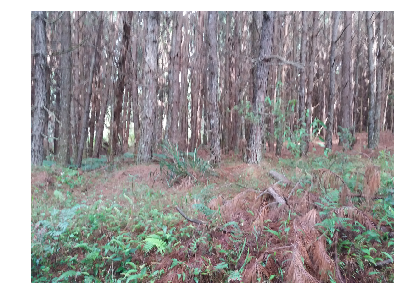

In [98]:
dc_path = "data2/test/"
list_paths = [get_1st(f"{dc_path}")]
plots_from_files(list_paths)

In [101]:
from PIL import Image  # uses pillow
 
im = Image.open('data2/test/151.jpg')
print(im.size)

(1154, 866)


In [0]:
arch=resnet101

In [106]:
import pandas as pd
labels=pd.read_csv('data2/train_labels.csv')
labels.head(10)

,name,invasive
0,1,0
1,2,0
2,3,1
3,4,0
4,5,1
5,6,0
6,7,1
7,8,1
8,9,0
9,10,0


In [0]:
label_csv = f'{PATH}train_labels.csv'
n = len(list(open(label_csv)))-1
val_idxs = get_cv_idxs(n)

In [0]:
def get_data(sz,bs):
  tfms=tfms_from_model(arch,sz, aug_tfms=transforms_side_on,max_zoom=1.1)
  data= ImageClassifierData.from_csv(PATH,'train',label_csv,bs,tfms=tfms,val_idxs=val_idxs,suffix='.jpg',test_name='test')
  return data

In [0]:
data=get_data(224,64)

In [110]:
data.classes

['0', '1']

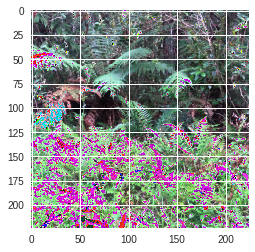

In [120]:
x,y = next(iter(data.val_dl))
plt.imshow(data.val_ds.denorm(to_np(x))[2]*1.4)

In [0]:
learn=ConvLearner.pretrained(arch,data)

In [138]:
learn.lr_find() # Learning rate finder

 93%|█████████▎| 27/29 [01:07<00:05,  2.52s/it, loss=3.45]

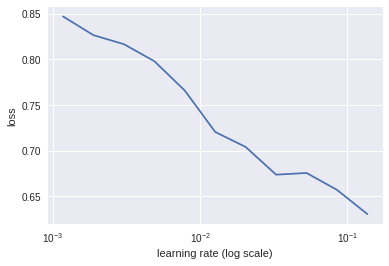

In [139]:
learn.sched.plot()

In [0]:
lr=0.02

In [141]:
learn.fit(lr, 3, cycle_len=1, cycle_mult=2)


epoch      trn_loss   val_loss   accuracy   
    0      0.387238   0.165186   0.947712  
    1      0.277633   0.122326   0.947712  
    2      0.227748   0.123121   0.956427  
    3      0.210494   0.144835   0.947712  
    4      0.195585   0.113761   0.954248  
    5      0.173213   0.107031   0.954248  
    6      0.152509   0.102423   0.962963  


[array([0.10242]), 0.9629629629629629]

###We'll use Differential learning rates for training on different layers and also We'll keep increaing the size of our model to prevent Overfitting

In [0]:
lrs=np.array([lr/6,lr/4,lr])

In [0]:
learn.unfreeze()

In [145]:
learn.fit(lrs,3,cycle_len=1,cycle_mult=2)

epoch      trn_loss   val_loss   accuracy   
    0      0.222132   0.134567   0.938998  
    1      0.148901   0.054021   0.980392  
    2      0.091771   0.059133   0.976035  
    3      0.06494    0.054884   0.980392  
    4      0.050319   0.067067   0.980392  
    5      0.038464   0.04415    0.989107  
    6      0.032154   0.051235   0.984749  


[array([0.05124]), 0.9847494553376906]

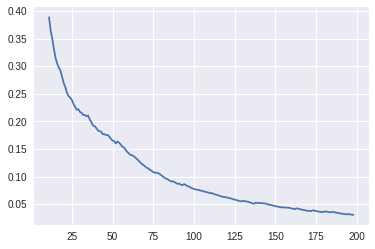

In [151]:
learn.sched.plot_loss()


In [0]:
learn.set_data(get_data(264,64))
learn.freeze()

In [153]:
learn.fit(lr,2,cycle_len=1,cycle_mult=2)

epoch      trn_loss   val_loss   accuracy   
    0      0.013955   0.052972   0.980392  
    1      0.011645   0.054343   0.980392  
    2      0.011011   0.056942   0.980392  


[array([0.05694]), 0.9803921568627451]

In [0]:
learn.set_data(get_data(264,32))


In [157]:
learn.unfreeze()
learn.fit(lrs,2,cycle_len=1,cycle_mult=2)

epoch      trn_loss   val_loss   accuracy   
    0      0.051472   0.062059   0.965142  
    1      0.072884   0.057206   0.978214  
    2      0.059933   0.053317   0.984749  


[array([0.05332]), 0.9847494553376906]

### We get our best results here!!

In [0]:
learn.save('good')
learn.set_data(get_data(299,32))


In [159]:
learn.freeze()
learn.fit(lr,2,cycle_len=1,cycle_mult=2)

epoch      trn_loss   val_loss   accuracy   
    0      0.06792    0.059328   0.980392  
    1      0.037707   0.062318   0.982571  
    2      0.028306   0.083418   0.976035  


[array([0.08342]), 0.9760348583877996]

In [161]:
learn.unfreeze()
learn.fit(lrs,2,cycle_len=1,cycle_mult=2)

epoch      trn_loss   val_loss   accuracy   
    0      0.068002   0.067197   0.978214  
    1      0.073997   0.092164   0.96732   
    2      0.054077   0.087876   0.971678  


[array([0.08788]), 0.971677559912854]

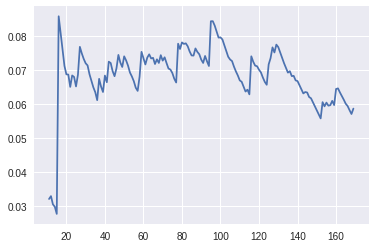

In [162]:
learn.sched.plot_loss()


In [0]:
learn.load('good')

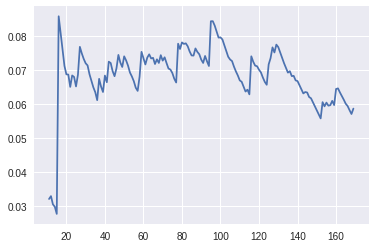

In [165]:
learn.sched.plot_loss()


###We were getting the best accuracy and minimum loss delta after training the data on 264*264 images. So we'll stick with that model

###Let's have a look at what our model is predicting

In [241]:
fn = data.val_ds.fnames[25]
fn

'train/136.jpg'

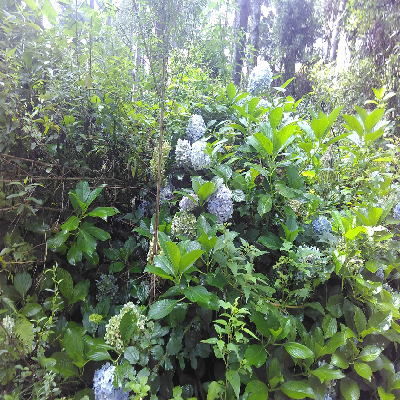

In [242]:
Image.open(PATH + fn).resize((400, 400))

**Look's pretty invasive to us and to our model**

In [243]:
trn_tfms, val_tfms = tfms_from_model(arch, 250)
im = val_tfms(open_image(PATH + fn)) # open_image() returns numpy.ndarray
preds = learn.predict_array(im[None])
np.argmax(preds)

1

In [249]:
fn1 = data.val_ds.fnames[5]
fn1

'train/49.jpg'

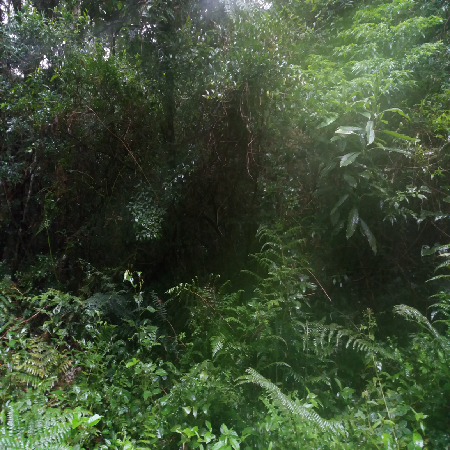

In [250]:
Image.open(PATH+fn1).resize((450,450))

**Looks like a pretty normal plant, So our model has predicted 0-not invasive**

In [0]:
t_tfms,val_tfms=tfms_from_model(arch,250)

In [252]:
im1 = val_tfms(open_image(PATH + fn1)) 
preds=learn.predict_array(im1[None])
np.argmax(preds)

0

##End.